### Introduction and Motivation:

Given a group of events a meteor shower, birth of quadruplets and being struck by lightning how would one categorize them? These items are interesting in nature because of the fact they are rare and deviate from normal behavior. [1] These events are known as anomalies.

In the digital era, we are connected by the internet. Although the internet has assisted in revolutionizing the quality of our lives, we often hear of network intrusions (Equifax, Yahoo email accounts) that wreck the normal functioning of an organization.

In general, according to IBM an organization spends nearly 10% of its yearly revenue in securing its network. This fact led us to think that it becomes imperative that we have a robust system that could potentially identify and thwart such intrusions before they cause havoc. Through this project we attempt to identify anomalies in networds and develop a model that could potentially prevent network attacks at an early stage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from IPython.display import HTML, display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
network_data=pd.read_csv("network_traffic.csv")

The data set obtained contains a detailed log of benign and malignant network sessions. In total we have around 3000 such records in the data set.

We plan to use the data set from 95-791: Data Mining course website which is an adaptation of the KDD Cup 1999 Data set for Network Anomaly detection.

Below is the brief description of the 23 fields in our dataset.

In [3]:
# information about the features in the dataset
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
duration              3000 non-null int64
protocol_type         3000 non-null object
service               3000 non-null object
flag                  3000 non-null object
src_bytes             3000 non-null int64
dst_bytes             3000 non-null int64
land                  3000 non-null int64
wrong_fragment        3000 non-null int64
urgent                3000 non-null int64
hot                   3000 non-null int64
num_failed_logins     3000 non-null int64
logged_in             3000 non-null int64
num_compromised       3000 non-null int64
root_shell            3000 non-null int64
su_attempted          3000 non-null int64
num_root              3000 non-null int64
num_file_creations    3000 non-null int64
num_shells            3000 non-null int64
num_access_files      3000 non-null int64
num_outbound_cmds     3000 non-null int64
is_host_login         3000 non-null int64
is_guest

### Data Cleaning Steps

Step 1: We quickly analyzed the data to remove those columns where there was not much variance or predominantly filled with zeros. This was done because such columns would not add any variation to the machine learning model being built instead their presence would make the model more complex.

In [4]:
# distribution of the datapoints of the features
network_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
count,3000.00000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.000000
mean,118.07800,4567.784000,2705.396667,0.0,0.0,0.0,0.066000,0.0,0.717667,0.296667,0.001000,0.000667,0.347667,0.001000,0.000333,0.004667,0.0,0.0,0.015000
std,964.53898,29461.821106,9988.330969,0.0,0.0,0.0,0.796987,0.0,0.450210,16.139707,0.031612,0.036515,17.804619,0.031612,0.018257,0.109463,0.0,0.0,0.121573
min,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.00000,136.750000,118.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.00000,228.000000,388.500000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.00000,316.000000,1955.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,24204.00000,283618.000000,273544.000000,0.0,0.0,0.0,25.000000,0.0,1.000000,884.000000,1.000000,2.000000,975.000000,1.000000,1.000000,5.000000,0.0,0.0,1.000000


Some of the features dropped were

land
wrong_fragment
Urgent
Num_failed_logins
Num_outbound_cmds
is_host_login

In [5]:
network_data.drop(['land','wrong_fragment','urgent','num_failed_logins','num_outbound_cmds','is_host_login'], axis = 1, inplace = True)


In [6]:
network_data.head(n=10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,is_intrusion
0,0,tcp,http,SF,302,896,0,1,0,0,0,0,0,0,0,0,0
1,0,tcp,http,SF,339,1588,0,1,0,0,0,0,0,0,0,0,0
2,0,tcp,http,SF,260,7334,0,1,0,0,0,0,0,0,0,0,0
3,0,tcp,http,SF,213,8679,0,1,0,0,0,0,0,0,0,0,0
4,0,tcp,http,SF,308,1658,0,1,0,0,0,0,0,0,0,0,0
5,0,tcp,http,SF,230,505,0,1,0,0,0,0,0,0,0,0,0
6,0,tcp,http,SF,221,445,0,1,0,0,0,0,0,0,0,0,0
7,0,tcp,http,SF,329,2431,0,1,0,0,0,0,0,0,0,0,0
8,0,tcp,http,SF,271,688,0,1,0,0,0,0,0,0,0,0,0
9,0,tcp,http,SF,326,566,0,1,0,0,0,0,0,0,0,0,0


Step 2: We also analyzed the column 'Is intrusion' and found that there was one entry that was incorrectly specified. So we decided to drop that entry inorder to maintain consistency with the intrusion and non-intrusion reccords

In [7]:
network_data['is_intrusion'].value_counts()

0     2699
1      300
0=       1
Name: is_intrusion, dtype: int64

In [8]:
network_data = network_data.loc[(network_data['is_intrusion'] == "0") | (network_data['is_intrusion'] == "1") ]

In [9]:
network_data['is_intrusion'].value_counts()

0    2699
1     300
Name: is_intrusion, dtype: int64

## Feature Engineering
Additionally, we observed that the duration column had a fair amount of values which were 0. In a network dataset, it would not be meaningfull to have such records.

We could either
a) Remove all such instances resulting in having very few records to train and test the model
b) Obtain the mean of duration and populate the zero entries with the mean

We choose to do the latter, since this is intuitive and we would not have to face a loss in data

In [10]:
network_data['duration'].value_counts()

0        2625
1          85
280        30
2          24
282        22
5          14
3          13
4           8
901         7
805         6
281         5
283         5
31          4
796         4
899         3
7           3
2075        3
14          3
25          3
22          3
907         3
10          3
2470        3
2474        3
15          3
19          2
2066        2
13          2
2065        2
16          2
         ... 
33          1
37          1
2100        1
65          1
2128        1
97          1
103         1
137         1
189         1
2634        1
8118        1
4777        1
948         1
898         1
15122       1
904         1
908         1
11020       1
926         1
938         1
13306       1
4785        1
3581        1
1600        1
1816        1
12151       1
6052        1
1974        1
4791        1
2015        1
Name: duration, Length: 121, dtype: int64

In [12]:
network_data['duration'].mean()

118.11737245748583

In [13]:
network_data['duration'].replace(0, network_data['duration'].mean(), inplace = True)

### One-Hot Encoding
Since there were several categorial variables and our model would not be able to understand them. We performed a one-hot encoding to transform these features so that our model can interpret them.

In [14]:
categorical = ['protocol_type','service','flag']

def one_hot_encoder(network_data):
    categorical_variables = categorical
    network_data_one_hot_encoded = pd.get_dummies(network_data, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(network_data_one_hot_encoded.dtypes)
    return network_data_one_hot_encoded
network_data_one_hot_encoded = one_hot_encoder(network_data)

====================[Data Types]====================
duration              float64
src_bytes               int64
dst_bytes               int64
hot                     int64
logged_in               int64
num_compromised         int64
root_shell              int64
su_attempted            int64
num_root                int64
num_file_creations      int64
num_shells              int64
num_access_files        int64
is_guest_login          int64
is_intrusion           object
protocol_type_icmp      uint8
protocol_type_tcp       uint8
protocol_type_udp       uint8
service_auth            uint8
service_domain_u        uint8
service_eco_i           uint8
service_ecr_i           uint8
service_finger          uint8
service_ftp             uint8
service_ftp_data        uint8
service_http            uint8
service_ntp_u           uint8
service_other           uint8
service_pop_3           uint8
service_private         uint8
service_smtp            uint8
service_telnet          uint8
service_time     

### Exploratory Data Analysis
After performing data cleaning and feature engineering, we moved into visualizing the data in order to get a sense of the network data.

### Visualization 1 : Count of Benign v/s Attack
From the plot, we can clearly we that we are dealing with imbalanced data here. There are far greater number of benign reccords than attacks in the dataset.
If we train our model with such data it would fail to generalize on the test data hence we would need to perform sampling on the data before we train our model.

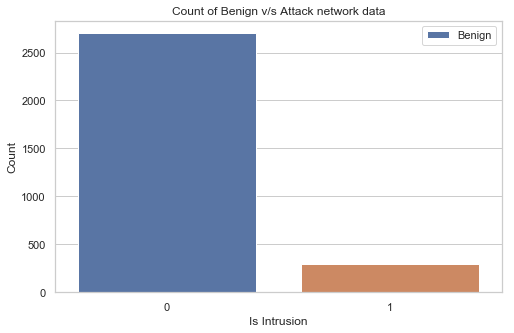

In [15]:
# plotting the benign and intrusion network calls
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(network_data['is_intrusion'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Is Intrusion")
plt.ylabel("Count")
plt.title("Count of Benign v/s Attack network data")
plt.show()

### Visualization 2 : Distribution of Benign v/s Attack source bytes
We observe that the distribution is skewed towards the left with majority source bytes less than 25000. Additionally, there are a few source bytes for attack records between 25000 and 30000 which could point to network attacks

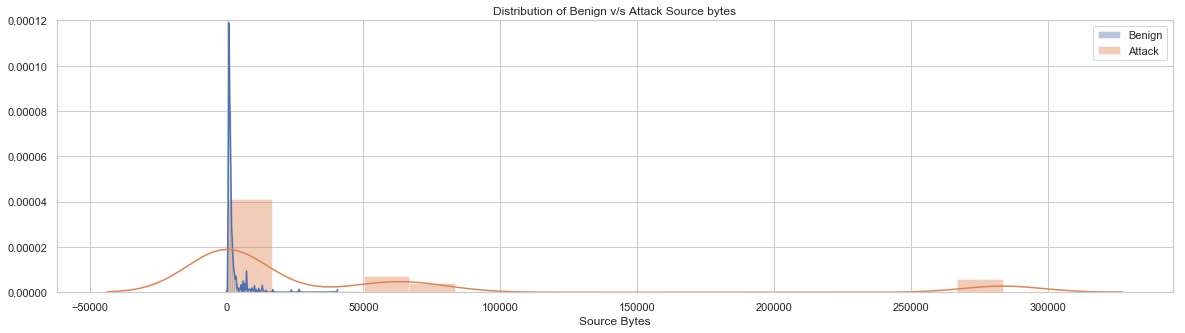

In [21]:
# plotting the src_bytes for benign Vs attack
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
plt.ylim(0.00000, 0.00012)
sns.distplot(network_data[network_data['is_intrusion'] == "0"]['src_bytes'])
sns.distplot(network_data[network_data['is_intrusion'] == "1"]['src_bytes'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Source Bytes")
plt.title("Distribution of Benign v/s Attack Source bytes")
plt.show()

### Visualization 3 : Distribution of Benign v/s Attack Destination bytes
We observe that the distribution is skewed towards the left with majority source bytes less than 10000.

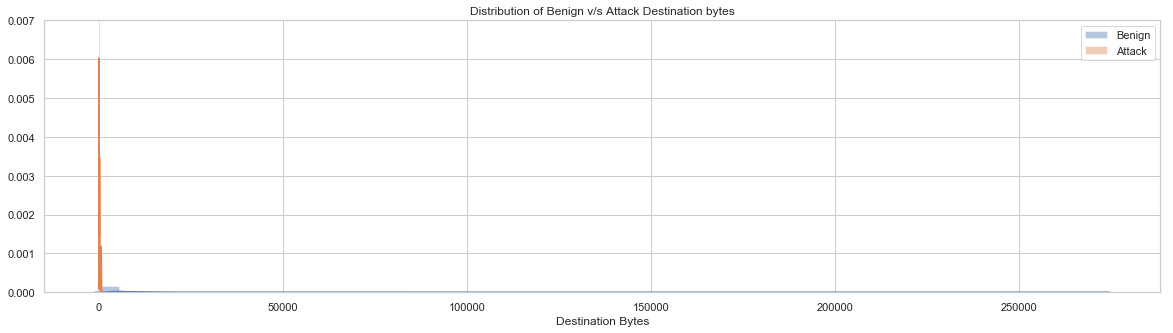

In [34]:
# plotting the _bytes for benign Vs attack
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
plt.ylim(0.00000, 0.007)
sns.distplot(network_data[network_data['is_intrusion'] == "0"]['dst_bytes'])
sns.distplot(network_data[network_data['is_intrusion'] == "1"]['dst_bytes'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Destination Bytes")
plt.title("Distribution of Benign v/s Attack Destination bytes")
plt.show()

### Visualization 4 : Count of service types for Benign v/s Attack records
For the benign reccords we see service types for http requests, private requests , smtp requests and domain_u requests consisting of the majority types.
For the attack reccords most of the service types consists of http, private and ftp_data.


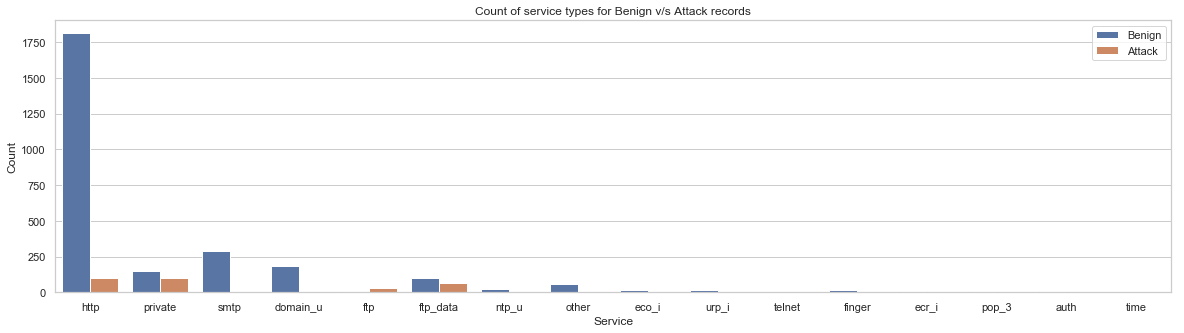

In [35]:
# splitting the benign and intrusion on the service
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.countplot(x = "service",data = network_data,hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Service")
plt.ylabel("Count")
plt.title("Count of service types for Benign v/s Attack records")
plt.show()

### Visualization 5 : Count of Flags for Benign v/s Attack records
Amongst, the various flags SF and Rejected show up for most of the benign records.
While, network attacks were categorized by SF, S0 and RSTR flags

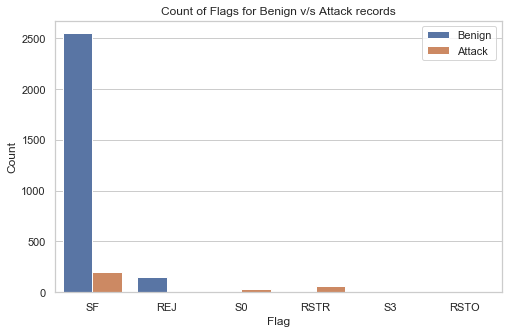

In [36]:
# splitting the benign and intrusion on the flag
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(x = "flag",data = network_data,hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Count of Flags for Benign v/s Attack records")
plt.show()

### Visualization 6 : Count of Protocol Types for Benign v/s Attack records
The network data consisted of mainly TCP,UDP and ICMP protocol types.
While protocol TCP comprised of majority of the records, most of the attacks seem to be associated with protocol type TCP or UDP

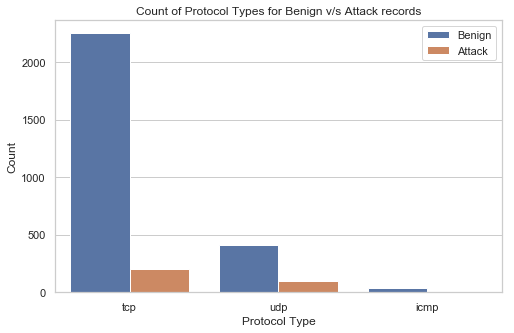

In [38]:
# splitting the benign and intrusion on the protocol_type
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(x = "protocol_type",data = network_data, hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.title("Count of Protocol Types for Benign v/s Attack records")
plt.show()

### Visualization 7 : Correlation Plot
We plotted a correlation plot to observe the highly correlated variables and decided to remove such variables because

a) Correlated variables do not add any new information into our model
b) A large number of features makes our model complex and difficult to interpret

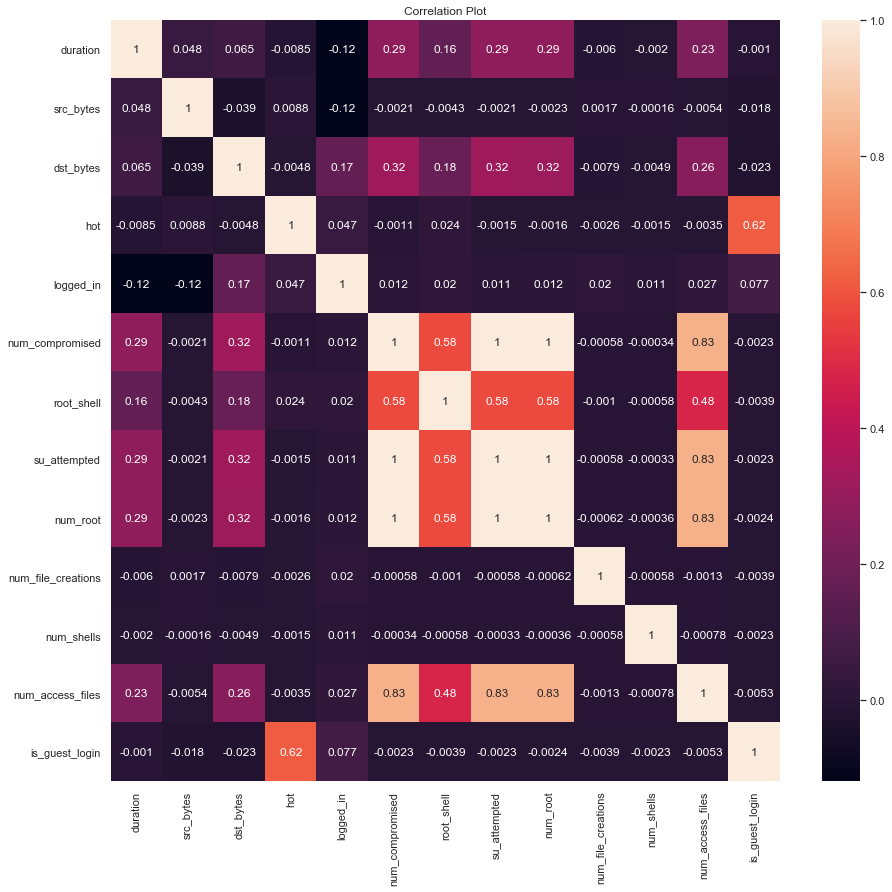

In [40]:
# plotting the correlation between different features
# this plot helps us in removing the features which are strongly related
sns.set(rc={'figure.figsize':(15,14)})
corr = network_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
plt.title("Correlation Plot")
plt.show()

Remove the highly correlated variables 'num_root' and 'su_attempted'.

In [41]:
network_data.drop(['num_root', 'su_attempted'], axis=1, inplace=True)

### Machine Learning Models
According to Tom Mitchell “A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E."

A) During supervised learning:

Our primary task T would be to distinguish anomalous and benign behavior and predict anomalous/ benign network intrusions.
Our performance P would be measured by accuracy, f1-score, ROC curve
Our experience E would be gained using the training data set.

### Supervised Learning - Comparision of Weak Learners and Ensemble Methods
We performed our comparision across different machine learning models

### A) Weak Learners

i)  Logistic Regression   
ii) Naive Bayes  

We choose to keep Logistic Regression as our baseline model based on which we would compare other models. 

### B) Ensemble Methods

They take a bunch of independent weak learners to combine their decisions and make an accurate prediction. 

i) Random Forests
ii) Ada Boost
### Test-Train split
We performed a Test-train split. Splitting our training and test data into a 75-25 (Train-Test) ratio.

In [42]:
# seperating the feature data and the label
ydata = network_data_one_hot_encoded.is_intrusion
Xdata = network_data_one_hot_encoded.drop('is_intrusion', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state = 25)

### SMOTE - Synthetic Minority Over-sampling Technique
Since we are dealing with imbalanced data we performed SMOTE(Synthetic Minority Over-sampling Technique) on our data. This technique removes imbalance in data by oversampling data by creating synthethic variations in the data. Thus helping us to balance our skewed dataset while not biasing the model.



In [43]:
# Using SMOTE to balance the train data we have
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(Xtrain,np.array(ytrain).ravel())

### Cross-Validation for Logistic Regression, Naive Bayes, Random Forest and Ada Boost
Cross Validation is an important pre-step while training your models. It assists in fine tuning hyper paramters in your model to ensure that your model does not overfit and generalizes well on unseen test data.

The below hyperparameters were tuned while training our model.

  Logistic Regression C (Regularization strength) = 1   
  Bernoulli Naive Bayes Alpha (Laplace smoothing parameter) = 0.01  
  Random Forests (Pruned depth) = 15  
  Ada boost (Number of Estimators) = 10  

Setting the Regularization parameter helps to penalize complex models and prevents overfitting.

#### Cross-Validation for Logistic Regression

In [44]:
# KFold - split dataset into 5 folds for determining the best value for hypervector
#refferred to UDA class notebook : https://gist.github.com/emaadmanzoor/0ba78a2920ea0858b54942eff8b08820
from sklearn.model_selection import KFold
num_folds = 5
k_fold = KFold(num_folds)
max_cross_c_score = -np.inf

for C in [1, 10, 100, 1000, 10000]:

    fold_scores = []
    print("C = %.2f " %(C))
    for k, (train, val) in enumerate(k_fold.split(X_train_sm, y_train_sm)):
        logisticRegression = LogisticRegression(C=C , random_state= 7)
        logisticRegression.fit(X_train_sm[train], y_train_sm[train])

        ypred = logisticRegression.predict(X_train_sm[val])
        yval = y_train_sm[val]
        # weighted accuracy calculated
        accuracy = f1_score(yval, ypred.ravel(), average='weighted')
        fold_scores.append(accuracy)
        # printing the accuracy and the hypervector value
        print("\t[fold {0}] C: {1:.2f}, accuracy: {2:.5f}".
              format(k, C, accuracy))

    cross_val_score = np.mean(fold_scores)
    if cross_val_score > max_cross_c_score:
        max_cross_c_score = cross_val_score
        arg_max = C
            
best_C = arg_max
print('\nLogistic Regression best C:',best_C)

C = 1.00 
	[fold 0] C: 1.00, accuracy: 0.83120
	[fold 1] C: 1.00, accuracy: 0.82258
	[fold 2] C: 1.00, accuracy: 0.83259
	[fold 3] C: 1.00, accuracy: 0.46736
	[fold 4] C: 1.00, accuracy: 0.46881
C = 10.00 
	[fold 0] C: 10.00, accuracy: 0.83120
	[fold 1] C: 10.00, accuracy: 0.82258
	[fold 2] C: 10.00, accuracy: 0.83259
	[fold 3] C: 10.00, accuracy: 0.46736
	[fold 4] C: 10.00, accuracy: 0.46881
C = 100.00 
	[fold 0] C: 100.00, accuracy: 0.83120
	[fold 1] C: 100.00, accuracy: 0.82258
	[fold 2] C: 100.00, accuracy: 0.83259
	[fold 3] C: 100.00, accuracy: 0.46736
	[fold 4] C: 100.00, accuracy: 0.46881
C = 1000.00 
	[fold 0] C: 1000.00, accuracy: 0.83120
	[fold 1] C: 1000.00, accuracy: 0.82258
	[fold 2] C: 1000.00, accuracy: 0.83259
	[fold 3] C: 1000.00, accuracy: 0.46736
	[fold 4] C: 1000.00, accuracy: 0.46881
C = 10000.00 
	[fold 0] C: 10000.00, accuracy: 0.83120
	[fold 1] C: 10000.00, accuracy: 0.82258
	[fold 2] C: 10000.00, accuracy: 0.83259
	[fold 3] C: 10000.00, accuracy: 0.46736
	[fold

#### Cross-validation for Bernoulli Naive Bayes

In [45]:
# using Kfold for creating 5 sets of the train data
#refferred to UDA class notebook : https://gist.github.com/emaadmanzoor/0ba78a2920ea0858b54942eff8b08820
from sklearn.model_selection import KFold
num_folds = 5
k_fold = KFold(num_folds)
max_cross_alpha_score = -np.inf

for Alpha in np.arange(0.01,1,0.1):
    fold_scores = []
    print("Alpha = %.2f " %(Alpha))
    for k, (train, val) in enumerate(k_fold.split(X_train_sm, y_train_sm)):
        nb_up = BernoulliNB(alpha = Alpha)
        nb_up.fit(X_train_sm[train], y_train_sm[train])

        ypred = nb_up.predict(X_train_sm[val])
        yval = y_train_sm[val]
        # weighted accuracy calculated
        accuracy = f1_score(yval, ypred, average='weighted')
        fold_scores.append(accuracy)
        
        print("\t[fold {0}] Alpha: {1:.2f}, accuracy: {2:.5f}".
              format(k, Alpha, accuracy))

    cross_val_score = np.mean(fold_scores)
    if cross_val_score > max_cross_alpha_score:
        max_cross_alpha_score = cross_val_score
        arg_max = Alpha
            
best_alpha = arg_max
print('\nNaive Bayes best alpha:',best_alpha)

Alpha = 0.01 
	[fold 0] Alpha: 0.01, accuracy: 0.91069
	[fold 1] Alpha: 0.01, accuracy: 0.92784
	[fold 2] Alpha: 0.01, accuracy: 0.94100
	[fold 3] Alpha: 0.01, accuracy: 0.99876
	[fold 4] Alpha: 0.01, accuracy: 0.99938
Alpha = 0.11 
	[fold 0] Alpha: 0.11, accuracy: 0.91069
	[fold 1] Alpha: 0.11, accuracy: 0.92784
	[fold 2] Alpha: 0.11, accuracy: 0.94100
	[fold 3] Alpha: 0.11, accuracy: 0.99876
	[fold 4] Alpha: 0.11, accuracy: 0.99938
Alpha = 0.21 
	[fold 0] Alpha: 0.21, accuracy: 0.91069
	[fold 1] Alpha: 0.21, accuracy: 0.92784
	[fold 2] Alpha: 0.21, accuracy: 0.94100
	[fold 3] Alpha: 0.21, accuracy: 0.99876
	[fold 4] Alpha: 0.21, accuracy: 0.99938
Alpha = 0.31 
	[fold 0] Alpha: 0.31, accuracy: 0.91069
	[fold 1] Alpha: 0.31, accuracy: 0.92784
	[fold 2] Alpha: 0.31, accuracy: 0.94100
	[fold 3] Alpha: 0.31, accuracy: 0.99876
	[fold 4] Alpha: 0.31, accuracy: 0.99938
Alpha = 0.41 
	[fold 0] Alpha: 0.41, accuracy: 0.91069
	[fold 1] Alpha: 0.41, accuracy: 0.92784
	[fold 2] Alpha: 0.41, accur

#### Cross validation for Random Forest.

In [46]:
num_folds = 5
k_fold = KFold(num_folds)
max_cross_depth_score = -np.inf

for depth in range(12,25,1):

    fold_scores = []
    print("Depth = %.2f " %(depth))
    for k, (train, val) in enumerate(k_fold.split(X_train_sm, y_train_sm)):
        clf_un = RandomForestClassifier(criterion='entropy', random_state=7, max_depth = depth)
        clf_un.fit(X_train_sm[train], y_train_sm[train])

        ypred = clf_un.predict(X_train_sm[val])
        yval = y_train_sm[val]
        accuracy = f1_score(yval, ypred, average='weighted')
        fold_scores.append(accuracy)
        
        print("\t[fold {0}] Depth: {1:.2f}, accuracy: {2:.5f}".
              format(k, depth, accuracy))

    cross_val_score = np.mean(fold_scores)
    if cross_val_score > max_cross_depth_score:
        max_cross_depth_score = cross_val_score
        arg_max = depth
            
best_depth = arg_max
print('\nRandom Forest Best Depth:',best_depth)

Depth = 12.00 
	[fold 0] Depth: 12.00, accuracy: 0.96042
	[fold 1] Depth: 12.00, accuracy: 0.97392
	[fold 2] Depth: 12.00, accuracy: 0.97796
	[fold 3] Depth: 12.00, accuracy: 1.00000
	[fold 4] Depth: 12.00, accuracy: 0.99876
Depth = 13.00 
	[fold 0] Depth: 13.00, accuracy: 0.96147
	[fold 1] Depth: 13.00, accuracy: 0.97392
	[fold 2] Depth: 13.00, accuracy: 0.97796
	[fold 3] Depth: 13.00, accuracy: 1.00000
	[fold 4] Depth: 13.00, accuracy: 0.99876
Depth = 14.00 
	[fold 0] Depth: 14.00, accuracy: 0.96147
	[fold 1] Depth: 14.00, accuracy: 0.97392
	[fold 2] Depth: 14.00, accuracy: 0.97796
	[fold 3] Depth: 14.00, accuracy: 1.00000
	[fold 4] Depth: 14.00, accuracy: 0.99876
Depth = 15.00 
	[fold 0] Depth: 15.00, accuracy: 0.97436
	[fold 1] Depth: 15.00, accuracy: 0.97392
	[fold 2] Depth: 15.00, accuracy: 0.97796
	[fold 3] Depth: 15.00, accuracy: 1.00000
	[fold 4] Depth: 15.00, accuracy: 0.99876
Depth = 16.00 
	[fold 0] Depth: 16.00, accuracy: 0.97436
	[fold 1] Depth: 16.00, accuracy: 0.97392
	

#### Cross Validation for Ada Boost¶

In [47]:
num_folds = 5
k_fold = KFold(num_folds)
max_cross_depth_score = -np.inf

for estimators in range(10,100,10):

    fold_scores = []
    print("Number of Estimators = %.2f " %(estimators))
    for k, (train, val) in enumerate(k_fold.split(X_train_sm, y_train_sm)):
        clf_ada = AdaBoostClassifier(random_state = 43)
        clf_ada.fit(X_train_sm[train], y_train_sm[train])

        ypred = clf_ada.predict(X_train_sm[val])
        yval = y_train_sm[val]
        accuracy = f1_score(yval, ypred, average='weighted')
        fold_scores.append(accuracy)
        
        print("\t[fold {0}] Number of Estimators: {1:.2f}, accuracy: {2:.5f}".
              format(k, estimators, accuracy))

    cross_val_score = np.mean(fold_scores)
    if cross_val_score > max_cross_depth_score:
        max_cross_depth_score = cross_val_score
        arg_max = estimators
            
best_estimators = arg_max
print('\nBest Estimator: ',best_estimators)

Number of Estimators = 10.00 
	[fold 0] Number of Estimators: 10.00, accuracy: 0.97230
	[fold 1] Number of Estimators: 10.00, accuracy: 0.97052
	[fold 2] Number of Estimators: 10.00, accuracy: 0.97917
	[fold 3] Number of Estimators: 10.00, accuracy: 1.00000
	[fold 4] Number of Estimators: 10.00, accuracy: 0.99876
Number of Estimators = 20.00 
	[fold 0] Number of Estimators: 20.00, accuracy: 0.97230
	[fold 1] Number of Estimators: 20.00, accuracy: 0.97052
	[fold 2] Number of Estimators: 20.00, accuracy: 0.97917
	[fold 3] Number of Estimators: 20.00, accuracy: 1.00000
	[fold 4] Number of Estimators: 20.00, accuracy: 0.99876
Number of Estimators = 30.00 
	[fold 0] Number of Estimators: 30.00, accuracy: 0.97230
	[fold 1] Number of Estimators: 30.00, accuracy: 0.97052
	[fold 2] Number of Estimators: 30.00, accuracy: 0.97917
	[fold 3] Number of Estimators: 30.00, accuracy: 1.00000
	[fold 4] Number of Estimators: 30.00, accuracy: 0.99876
Number of Estimators = 40.00 
	[fold 0] Number of Estim

### Testing our models
Using the optimized hyper parameters learnt from cross validation we tested our models using the test data.
The evaluation metrics used were confusion matrix, accuracy and f1-score.

A) Confusion matrix: It computes the accuracy of a classification. It counts true negatives, false negatives, true positives, and false positives.

B) Accuracy: It determines how well the model performs based on true and predicted labels.

A) F-1 score: It computes the weighted average of precision and recall. A score closer to 1 is considered as good and 0 as bad.

In [48]:
# Prediction using the best hyper parameter and getting confusion matrix
# misclassification, f1 score,  roc curve, false poitive rate, true positive rate
# for compaing the differnet models.
# Naive Bayes
nb = BernoulliNB(alpha = best_alpha)
nb.fit(X_train_sm, y_train_sm)
# predict_prba - for probability estimates of Xtest
ypred_NB_prob = nb.predict_proba(Xtest)

# perform classification on array of test vectors
ypred_NB= nb.predict(Xtest)

print("********Naive Bayes*********")

print("Confusion Matrix")
cm_NB = confusion_matrix(ytest, ypred_NB)
print(cm_NB)
print()

print()
misclassification = 1 - accuracy_score(ytest, ypred_NB)                                      
print("Misclassification Rate", misclassification)
print("Accuracy", accuracy_score(ytest, ypred_NB))

f1_NB = f1_score(ytest, ypred_NB, average='weighted')
print("F1 -score", f1_NB)
print()

# Prediction using the best hyper parameters and getting confusion matrix
# misclassification, f1 score,  roc curve, false poitive rate, true positive rate
# for compaing the differnet models.
# Logistic Regression

logisticRegression = LogisticRegression(C=best_C , random_state= 7)
logisticRegression.fit(X_train_sm, y_train_sm)

ypredict_lr = logisticRegression.predict_proba(Xtest)
ypred_lr = logisticRegression.predict(Xtest)

print("********Logistic Regression*********")

print("Confusion Matrix")
cm_lr = confusion_matrix(ytest, ypred_lr)
print(cm_lr)
print()

print()
misclassification = 1 - accuracy_score(ytest, ypred_lr)                                      
print("Misclassification Rate", misclassification)
print("Accuracy", accuracy_score(ytest, ypred_lr))
f1_score_lr = f1_score(ytest, ypred_lr, average='weighted')
print("F1 -score",f1_score_lr)

# Prediction using the best hyper parameters and getting confusion matrix
# misclassification, f1 score,  roc curve, false poitive rate, true positive rate
# for compaing the differnet models.
# Random Forest
clf_sm = RandomForestClassifier(criterion="entropy", random_state = 7 , max_depth=best_depth)
clf_sm.fit(X_train_sm, y_train_sm)

ypredict_rf_smote = clf_sm.predict_proba(Xtest)
ypred_rf_smote = clf_sm.predict(Xtest)

print()

print("********Random Forest*********")

print("Confusion Matrix")
cm_rf = confusion_matrix(ytest, ypred_rf_smote)
print(cm_rf)
print()

print()
misclassification = 1 - accuracy_score(ytest, ypred_rf_smote)                                      
print("Misclassification Rate", misclassification)
print("Accuracy", accuracy_score(ytest, ypred_rf_smote))
f1_score_rf = f1_score(ytest, ypred_rf_smote, average='weighted')
print("F1 score",f1_score_rf)


clf_ada = AdaBoostClassifier(n_estimators = best_estimators , random_state = 43)
clf_ada.fit(X_train_sm, y_train_sm)

ypredict_ada_smote = y_score_ada = clf_ada.predict_proba(Xtest)
ypred_ada_smote = clf_ada.predict(Xtest)

print()
print("********AdaBoost*********")

print()
print("Confusion Matrix")
cm_ada = confusion_matrix(ytest, ypred_ada_smote)
print(cm_ada)
print()

print()
misclassification = 1 - accuracy_score(ytest, ypred_ada_smote)                                      
print("Misclassification Rate of ", misclassification)
print("Accuracy ", accuracy_score(ytest, ypred_ada_smote))
f1_score_svm = f1_score(ytest, ypred_ada_smote, average='weighted')
print("F1 score",f1_score_svm)

********Naive Bayes*********
Confusion Matrix
[[618  55]
 [  0  77]]


Misclassification Rate 0.07333333333333336
Accuracy 0.9266666666666666
F1 -score 0.9347536929077147

********Logistic Regression*********
Confusion Matrix
[[620  53]
 [ 37  40]]


Misclassification Rate 0.12
Accuracy 0.88
F1 -score 0.8849252543122511

********Random Forest*********
Confusion Matrix
[[655  18]
 [  1  76]]


Misclassification Rate 0.02533333333333332
Accuracy 0.9746666666666667
F1 score 0.9757638993395201

********AdaBoost*********

Confusion Matrix
[[634  39]
 [  0  77]]


Misclassification Rate of  0.052000000000000046
Accuracy  0.948
F1 score 0.952478063516101


#### Conclusion:
From the above models we can clearly see

#### Accuracy Scores: Random Forest > Adaboost > Naive Bayes > Logistic Regression
#### F1 Scores: Random Forest > Adaboost > Naive Bayes > Logistic Regression

The confusion matrices also depict how the true negatives, false negatives, true positives, and false positive are represented. A good classifier will have high true positives and true negatives which is seen for Random Forests.

#### Overall, Random Forests performs the best.

In general, we observe that Random Forests and Adaboost (Ensemble methods) perform better than Naive Bayes and Logistic Regression (Weak Learners).Logistic Regression our baseline model performs the worst in this scenario.

#### ROC curve
The Receiver operating characteristic (ROC) curve represents the False positive Rate to True positive Rate. A Low False Positive Rate and High True positive Rate is desired by a good classifier.

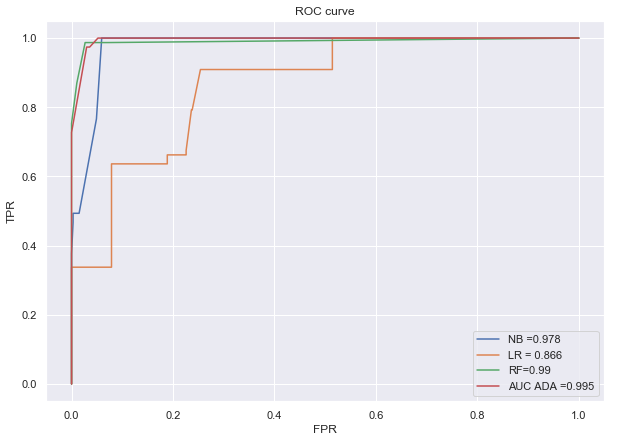

In [49]:
plt.figure(figsize=(10,7))

fpr, tpr, thresholds = roc_curve(np.array(ytest).astype(int), ypred_NB_prob[:,1])
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="NB =" + str(round(auc,3)))

fpr, tpr, thresholds = roc_curve(np.array(ytest).astype(int), ypredict_lr [:,1])
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="LR = " + str(round(auc,3)))

fpr, tpr, thresholds = roc_curve(np.array(ytest).astype(int), ypredict_rf_smote[:,1])
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="RF=" + str(round(auc,3)))

fpr, tpr, thresholds = roc_curve(np.array(ytest).astype(int), np.array(ypredict_ada_smote[:,1]).ravel())
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="AUC ADA =" + str(round(auc,3)))

plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(b=True)
plt.legend()
plt.show()

#### Precision-Recall curve
Precision recall curves measure the sucess of a prediction when classes are imbalanced. It measures the precision and recall at various threshold.

A high precision represents low false positive rate, and a high recall represents a low false negative rate.

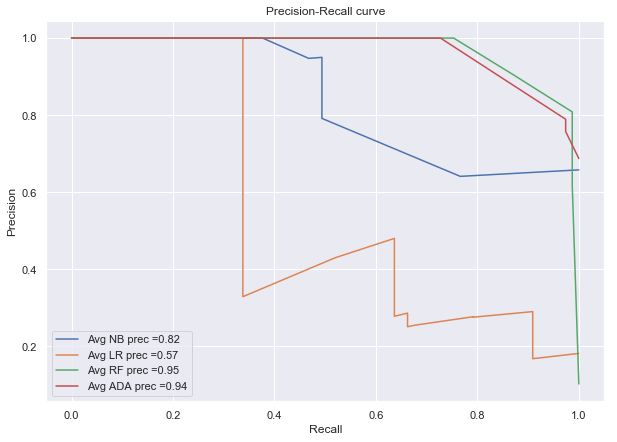

In [50]:
plt.figure(figsize=(10,7))

precision, recall, _ = precision_recall_curve(np.array(ytest).astype(int), ypred_NB_prob[:,1])
plt.plot(recall, precision, label="Avg NB prec =" + str(round(average_precision_score(np.array(ytest).astype(int),ypred_NB_prob[:,1]),2)))

precision, recall, _ = precision_recall_curve(np.array(ytest).astype(int), ypredict_lr[:,1])
plt.plot(recall, precision, label="Avg LR prec =" + str(round(average_precision_score(np.array(ytest).astype(int),ypredict_lr[:,1]),2)))

precision, recall, _ = precision_recall_curve(np.array(ytest).astype(int), ypredict_rf_smote[:,1])
plt.plot(recall, precision, label="Avg RF prec =" +str(round(average_precision_score(np.array(ytest).astype(int),ypredict_rf_smote[:,1]),2)))

precision, recall, _ = precision_recall_curve(np.array(ytest).astype(int), ypredict_ada_smote[:,1])
plt.plot(recall, precision, label="Avg ADA prec =" + str(round(average_precision_score(np.array(ytest).astype(int),ypredict_ada_smote[:,1]),2)))

plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(b=True)
plt.legend()
plt.show() 

#### Conclusion : PR curve of Random Forests > Adaboost > Naive Bayes > Logistic Regression

#### Relative importance of features
Since Random Forests provides us with a list of important features we can visualize this in the below plot

In [55]:
features = Xdata.columns
importances = clf_sm.feature_importances_
indices = np.argsort(importances)

important_features = {}
for idx in indices:
     if(importances[idx] > 0):
        important_features[features[idx]] = importances[idx]


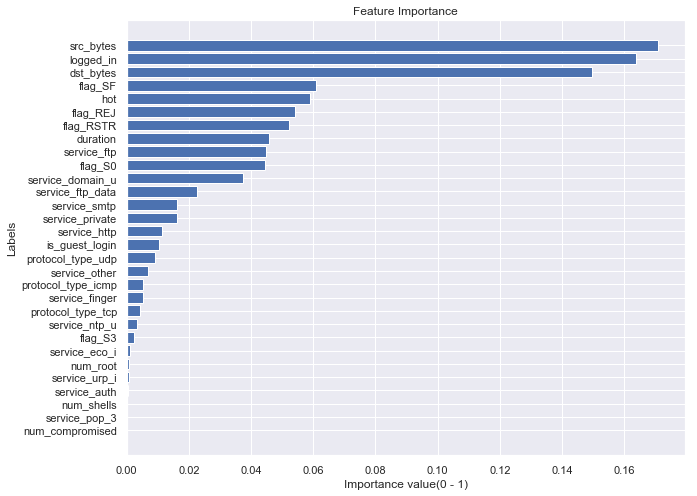

In [56]:
plt.figure(figsize=(10,8))
plt.barh(range(len(important_features)), list(important_features.values()), align='center')
plt.yticks(range(len(important_features)), list(important_features.keys()))
plt.title("Feature Importance")
plt.xlabel("Importance value(0 - 1)")
plt.ylabel("Labels")
plt.show()

#### Unsupervised Learning - Hierarchial Clustering and K-Means Clustering
After, sucessfully performing Supervised Learning to predict whether there was an intrusion or not. We wanted to analyze what are the types of attacks present in the network intrusion data. Our next step was using various clustering techniques in Unsupervised Machine Learning to identify the various types of attacks.

#### Pre-processing Steps
STEP 1 : Subset the Network data to now include rows only containing intrusion relevant data. This is done because we are interested in identifying patterns in the intrusion relevant data and not the entire network dataset.

In [57]:
network_data_intrusion = network_data_one_hot_encoded.loc[network_data_one_hot_encoded['is_intrusion'] == '1']
network_data_intrusion.reset_index();

STEP 2 : Additionally, since we had 36 features building a model with all these features would make it complex. We choose to describe the data and remove those columns which had zeros or constant variance.

In [58]:
network_data_intrusion.describe()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,...,service_smtp,service_telnet,service_time,service_urp_i,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S3,flag_SF
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.0,300.000000,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.000000,300.000000,300.000000
mean,375.356120,41320.930000,113.416667,0.236667,0.336667,0.0,0.0,0.0,0.003333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.216667,0.110000,0.006667,0.666667
std,466.545447,84734.594005,182.626278,0.644495,0.473359,0.0,0.0,0.0,0.057735,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.412662,0.313413,0.081513,0.472192
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,118.117372,105.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,118.117372,105.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
75%,282.000000,57964.000000,146.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
max,2100.000000,283618.000000,601.000000,2.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


Deleting all the fields which have no variance or low variance

In [59]:
(network_data_intrusion.drop(['num_compromised','root_shell','num_file_creations','num_shells','num_access_files',
                             'protocol_type_icmp','service_auth','service_domain_u','service_eco_i','service_ecr_i',
                              'service_finger','service_ntp_u','service_other','service_pop_3',
                             'service_smtp','service_telnet','service_time','service_urp_i','flag_REJ','flag_RSTO'], 
                              axis = 1, inplace = True))

network_data_intrusion.drop(['is_intrusion'], axis = 1, inplace = True)

print("Remaining Columns are\n")
columns = network_data_intrusion.columns.get_values()
for i in range(len(columns)):
    print(columns[i])

Remaining Columns are

duration
src_bytes
dst_bytes
hot
logged_in
su_attempted
num_root
is_guest_login
protocol_type_tcp
protocol_type_udp
service_ftp
service_ftp_data
service_http
service_private
flag_RSTR
flag_S0
flag_S3
flag_SF


STEP 3 : Since we are performing Clustering which makes use distance metrics, it is important to standardize the data to ensure every data point is represented equally when computing respective clusters

In [60]:
scaler = StandardScaler()
Xdata_new_d = scaler.fit_transform(network_data_intrusion)

#### Clustering
We will explore one kind of Clustering Technique which is widely used i.e. K means clustering.

K-Means : Performs Clustering into K clusters using a user specified K.

#### K-Means Clustering
In K-Means Clustering, the user specifies the number of clusters on which clustering is performed. But how do we know what is the optimal number of cluster. We can make use of the elbow method which measures the minimum distortion from the cluster centers as number of cluster increases. The point on the elbow plot where a "knee" is observed is considered as the optimal cluster.

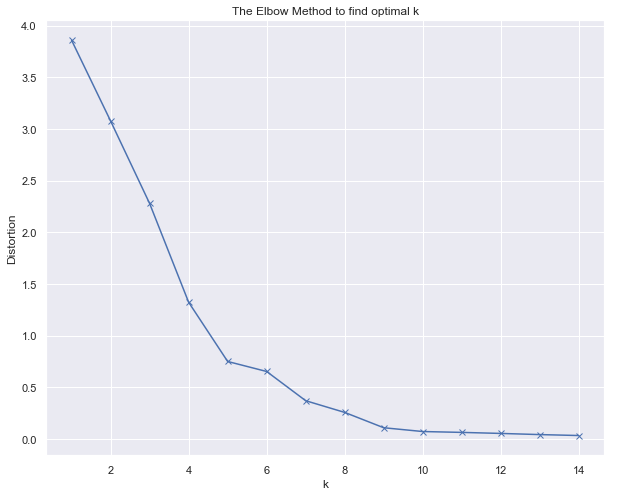

In [61]:
#Reffered to https://stackoverflow.com/questions/49031951/python-elbow-chart-issue
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Xdata_new_d)
    distortions.append(sum(np.min(cdist(Xdata_new_d , kmeanModel.cluster_centers_,'euclidean'), axis=1)) / Xdata_new_d.shape[0])
plt.figure(figsize=(10,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to find optimal k')
plt.show()

In the above plot, the knee is observed at 4. Hence, the optimal number of clusters is 4 which also corresponds to the type of clusters found in this dataset as mentioned on the KDD99 Cup Website for Network Intrusion dataset.

#### Dimensionality Reduction of data to view the clusters
We start off with 16 features for unsupervised learning. Trying to visualize all these 16 features using the cluster labels would be difficult. Therefore, we performed a dimensionality reduction using TSNE to reduce the data into 2-dimensions.

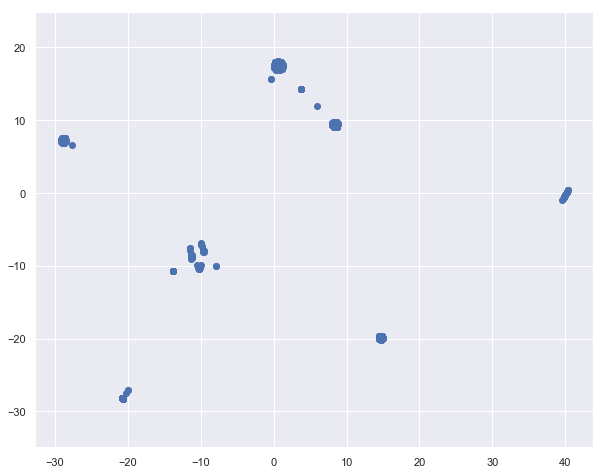

In [63]:
tsne = TSNE(n_components=2, random_state=0)
Xdata_tsne2d = tsne.fit_transform(Xdata_new_d)
plt.figure(figsize=(10,8))
plt.scatter(Xdata_tsne2d[:, 0], Xdata_tsne2d[:, 1])
plt.axis('equal');

#### performing k means and viewing the clusters

(-32.70589309302709,
 43.87329536048314,
 -30.567825707905072,
 20.401522073261525)

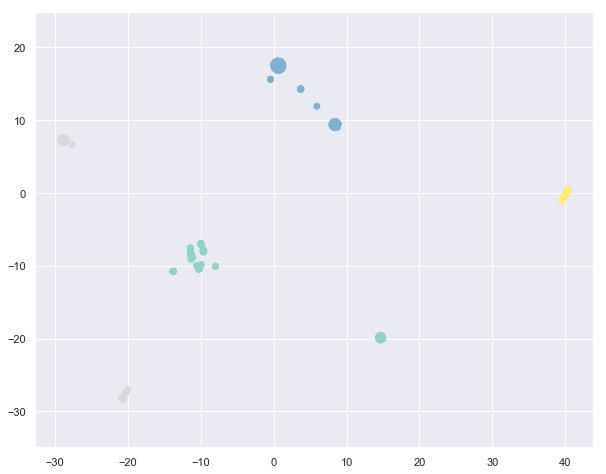

In [68]:
km = KMeans(n_clusters=4)
km.fit(Xdata_new_d )
kmeans_cluster_assignments = km.predict(Xdata_new_d)
plt.figure(figsize=(10,8))
plt.scatter(Xdata_tsne2d[:, 0], Xdata_tsne2d[:, 1],
            c=kmeans_cluster_assignments,
            cmap='Set3')
plt.axis('equal')

#### Cluster 0

In [69]:
len(network_data_intrusion[km.labels_ == 0])

100

In [70]:
network_data_intrusion[km.labels_ == 0].head()

,duration,src_bytes,dst_bytes,hot,logged_in,su_attempted,num_root,is_guest_login,protocol_type_tcp,protocol_type_udp,service_ftp,service_ftp_data,service_http,service_private,flag_RSTR,flag_S0,flag_S3,flag_SF
190,118.117372,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
210,902.000000,56504,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
212,2065.000000,56504,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
234,118.117372,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
255,896.000000,55744,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


#### Cluster 1

In [71]:
len(network_data_intrusion[km.labels_ == 1])

100

In [72]:
network_data_intrusion[km.labels_ == 1].head()

,duration,src_bytes,dst_bytes,hot,logged_in,su_attempted,num_root,is_guest_login,protocol_type_tcp,protocol_type_udp,service_ftp,service_ftp_data,service_http,service_private,flag_RSTR,flag_S0,flag_S3,flag_SF
15,118.117372,105,146,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
67,118.117372,105,105,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
72,118.117372,105,146,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
75,118.117372,105,146,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
81,118.117372,105,147,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


#### Cluster 2

In [73]:
len(network_data_intrusion[km.labels_ == 2])

67

In [74]:
network_data_intrusion[km.labels_ == 2].head()

,duration,src_bytes,dst_bytes,hot,logged_in,su_attempted,num_root,is_guest_login,protocol_type_tcp,protocol_type_udp,service_ftp,service_ftp_data,service_http,service_private,flag_RSTR,flag_S0,flag_S3,flag_SF
1499,118.117372,12,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1566,118.117372,12,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1578,280.000000,283618,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1586,280.000000,283618,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1602,118.117372,12,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


#### Cluster 3

In [75]:
len(network_data_intrusion[km.labels_ == 3])

33

In [77]:
network_data_intrusion[km.labels_ == 3].head()

,duration,src_bytes,dst_bytes,hot,logged_in,su_attempted,num_root,is_guest_login,protocol_type_tcp,protocol_type_udp,service_ftp,service_ftp_data,service_http,service_private,flag_RSTR,flag_S0,flag_S3,flag_SF
1557,282.0,160,595,2,1,0,0,1,1,0,1,0,0,0,0,0,0,1
1574,282.0,162,597,2,1,0,0,1,1,0,1,0,0,0,0,0,0,1
1583,282.0,158,595,2,1,0,0,1,1,0,1,0,0,0,0,0,0,1
1585,282.0,160,599,2,1,0,0,1,1,0,1,0,0,0,0,0,0,1
1592,282.0,164,601,2,1,0,0,1,1,0,1,0,0,0,0,0,0,1


We observe that there are four clusters

Cluster 0 : 100 records

Cluster 1 : 100 records

Cluster 2 : 67 records

Cluster 3 : 33 records

These attacks correspond to the 4 types of intrusions reported on the KDD99 Network Intrusion Network Dataset (kddcup99, 1999)

"DOS: denial-of-service, e.g. syn flood;

R2L: unauthorized access from a remote machine, e.g. guessing password;

U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;

Probing: surveillance and other probing, e.g., port scanning."[2]

### Conclusion
Based on our analysis we found that

a) Ensemble methods(Random Forests and Adaboost) performed better than Weak Learners(Logistic Regression and Naive Bayes).

b) Overall, Random Forests and Adaboost achieved higher accuracy, F1-score, ROC and PR scores.

c) In Unsupervised Learning, K-Means showed us that there were 4 clusters in the data. Out of 300 intrusion reccords 100 belonged to cluster 0, 100 belonged to cluster 1, 67 belonged to cluster 2 and 33 belonged to cluster 3.